# Sulfur Oxygen Equilibrium

This example shows equilibrium calculations for sulfur/oxygen mixtures.

In [1]:
import gaspype as gp
import numpy as np
import matplotlib.pyplot as plt

List possible sulfur/oxygen species:

In [2]:
gp.species(element_names = 'S, O')

['O',
 'O2',
 'O3',
 'S',
 'S2',
 'S2O',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'SO',
 'SO2',
 'SO3']

Or more specific by using regular expressions:

In [3]:
gp.species('S?[2-3]?O?[2-5]?', use_regex=True)

['O', 'O2', 'O3', 'S', 'S2', 'S2O', 'S3', 'S4', 'S5', 'SO', 'SO2', 'SO3']

Calculation of the molar equilibrium fractions for sulfur and oxygen depending on the oxygen to sulfur ratio:

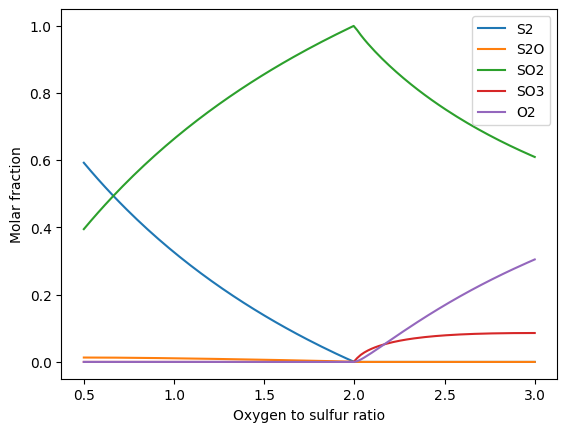

In [4]:
fs = gp.fluid_system(['S2', 'S2O', 'SO2', 'SO3', 'O2'])

oxygen_ratio = np.linspace(0.5, 3, num=128)
el = gp.elements({'S': 1}, fs) + oxygen_ratio * gp.elements({'O': 1}, fs)

composition = gp.equilibrium(el, 800+273.15, 1e4)

fig, ax = plt.subplots()
ax.set_xlabel("Oxygen to sulfur ratio")
ax.set_ylabel("Molar fraction")
ax.plot(oxygen_ratio, composition.get_x(), '-')
ax.legend(composition.species)

Calculation of the molar equilibrium fractions for sulfur and oxygen depending on temperature in °C:

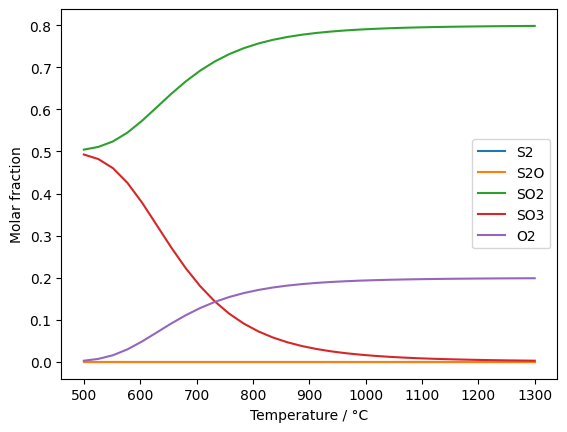

In [5]:
fs = gp.fluid_system(['S2', 'S2O', 'SO2', 'SO3', 'O2'])

el = gp.elements({'S': 1, 'O':2.5}, fs)

t_range = np.linspace(500, 1300, num=32)
composition = gp.equilibrium(el, t_range+273.15, 1e4)

fig, ax = plt.subplots()
ax.set_xlabel("Temperature / °C")
ax.set_ylabel("Molar fraction")
ax.plot(t_range, composition.get_x(), '-')
ax.legend(composition.species)